In [515]:
import seaborn as sns
from statannot import add_stat_annotation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
sns.set(style='white',font_scale=1.5,)


In [516]:
from statsmodels.discrete.discrete_model import Logit
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve

In [517]:
df = pd.read_excel('./aggresive-sm.xlsx')

In [518]:
df = df.set_index('PID')

In [519]:
set1 =  ['Her2', 'ER', 'PR', 'SCRIB', 'WASF3']
set2 =  ['Her2-SHC', 'Her2-GRB2',
       'ER-GATA3', 'ER-FOXA1', 'PR-TIF2', 'PR-SRC-1', 'SCRIB-VANGL1',
       'SCRIB-NOS1AP', 'WASF3-CYFIP1', 'WASF3-NCKAP1',]
set3 =  ['Her2-GRB2-SHC',
       'ER-GATA3-FOXA1', 'PR-TIF2-SRC-1', 'SCRIB-VANGL1-NOS1AP',
       'WASF3-CYFIP1-NCKAP1']

# 1-mer的结果

# logistic regression

In [520]:
y = df['Group']

Y = y.map({'more aggresive':1, 'less aggresive':0})
X = df[set1]

#X = sm.add_constant(X)
clf1 = Logit(Y, X)
model = clf1.fit(maxiter=2)
model.summary2()


         Current function value: 0.472081
         Iterations: 2


/home/shenwanxiang/anaconda3/envs/tf2/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Pseudo R-squared: 0.160  
Dependent Variable: Group            AIC:              32.6599
Date:               2020-12-28 21:08 BIC:              38.5502
No. Observations:   24               Log-Likelihood:   -11.330
Df Model:           4                LL-Null:          -13.496
Df Residuals:       19               LLR p-value:      0.36291
Converged:          0.0000           Scale:            1.0000 
No. Iterations:     2.0000                                    
----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
Her2     0.6846     0.8765    0.7811   0.4347   -1.0332   2.4024
ER       0.8297     1.3257    0.6258   0.5314   -1.7687   3.4281
PR      -0.8090     1.3161   -0.6147   0.5388   -3.3886   1.7706
SCRIB    0.2232     0.1899    1.1751   0.2400   -0.1491   0.5954
WASF3   -0.8755     1.3090   -0.6688   0.5036   -3.4411   1.6901
==============================================================

"""

In [521]:
data = pd.DataFrame(model.predict(X), columns = ['Predicted probablity'], index = df.index)
data['Average intensity'] = X.mean(axis = 1)
data['Group'] = y

## ROC

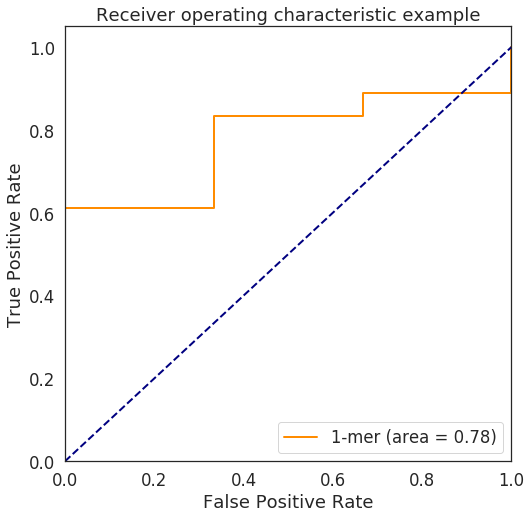

In [522]:
roc = roc_auc_score(Y, data['Predicted probablity'])
fpr, tpr, _ = roc_curve(Y, data['Predicted probablity'])

plt.figure(figsize= (8,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='1-mer (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 准确率

In [523]:
acc = accuracy_score(Y, data['Predicted probablity'].round())
acc

0.7083333333333334

Text(0.35, 3.3720488268935025, 'acc:0.71, auc:0.78')

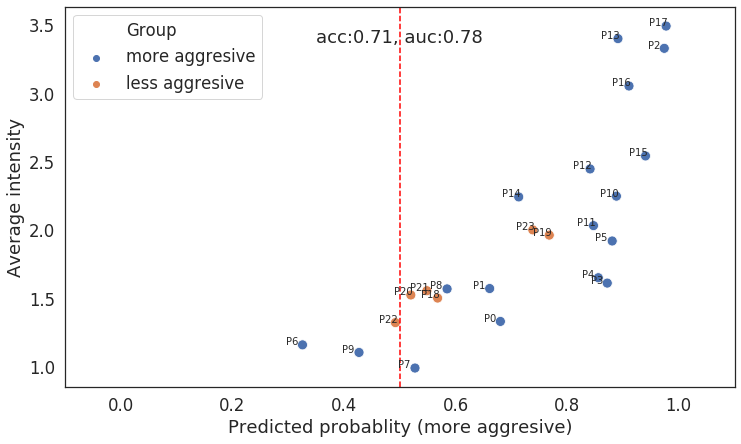

In [524]:
fig, ax = plt.subplots(figsize= (12,7))

g =sns.scatterplot(x = 'Predicted probablity', y = 'Average intensity', s= 100,
                   hue = 'Group', ax= ax, data=data)

ax.set_xlabel('Predicted probablity (more aggresive)')
ax.set_xlim(-0.1,1.1)

ax.axvline(x=0.5, ls = '--', color= 'red')

for i in range(len(data)):
    d = data.iloc[i]
    x = d['Predicted probablity']
    y1 = d['Average intensity']
    ax.text(x-0.03,y1, 'P%s' % i, fontsize=10)
 
ax.text(0.35,data['Average intensity'].max() - 0.12, 'acc:%.2f, auc:%.2f' % (acc,roc))

# 导出数据

In [525]:
data.to_excel('./导出logistics回归-1mer.xlsx')

## 2-mer的结果

In [526]:
y = df['Group']

Y = y.map({'more aggresive':1, 'less aggresive':0})
X = df[set2]

#X = sm.add_constant(X)
clf1 = Logit(Y, X)
model = clf1.fit(maxiter = 2)
model.summary2()

         Current function value: 0.324479
         Iterations: 2


/home/shenwanxiang/anaconda3/envs/tf2/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Pseudo R-squared: 0.423  
Dependent Variable: Group            AIC:              35.5750
Date:               2020-12-28 21:08 BIC:              47.3555
No. Observations:   24               Log-Likelihood:   -7.7875
Df Model:           9                LL-Null:          -13.496
Df Residuals:       14               LLR p-value:      0.24820
Converged:          0.0000           Scale:            1.0000 
No. Iterations:     2.0000                                    
--------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------
Her2-SHC         0.2451   0.3808  0.6436 0.5199 -0.5013 0.9914
Her2-GRB2       -0.0575   1.0322 -0.0557 0.9556 -2.0807 1.9656
ER-GATA3        -0.3265   0.8129 -0.4017 0.6879 -1.9197 1.2666
ER-FOXA1         0.8197   1.0099  0.8116 0.4170 -1.1598 2.7991
PR-TIF2         -0.7269   1.0537 -0.6898 0.4903 -2.7921 1.3383
PR-SRC-1         0.1250   0.2900  0.4309 0.6665 -0.4435 0.6934
SCRIB-VANGL1     0.0165   1.7362  0.0095 0.9924 -3.3864 3.4194
SCRIB-NOS1AP     0.7742   1.9978  0.3875 0.6984 -3.1414 4.6899
WASF3-CYFIP1     0.2417   0.8827  0.2738 0.7843 -1.4885 1.9718
WASF3-NCKAP1    -0.1766   0.8106 -0.2178 0.8276 -1.7653 1.4121
==============================================================

"""

In [527]:
data = pd.DataFrame(model.predict(X), columns = ['Predicted probablity'], index = df.index)
data['Average intensity'] = X.mean(axis = 1)
data['Group'] = y

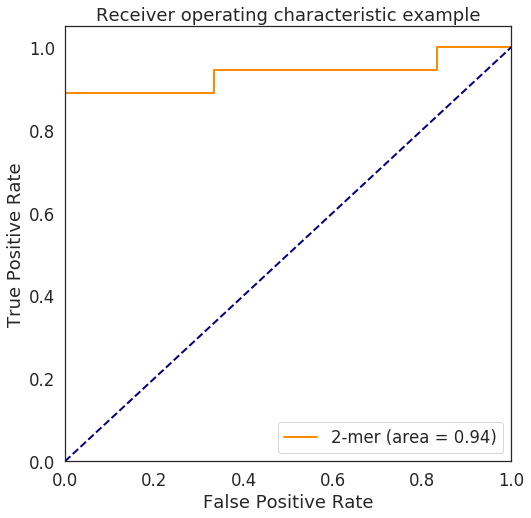

In [528]:
roc = roc_auc_score(Y, data['Predicted probablity'])
fpr, tpr, _ = roc_curve(Y, data['Predicted probablity'])

plt.figure(figsize= (8,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='2-mer (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [529]:
acc = accuracy_score(Y, data['Predicted probablity'].round())
acc

0.7916666666666666

Text(0.35, 13.496200000000004, 'acc:0.79, auc:0.94')

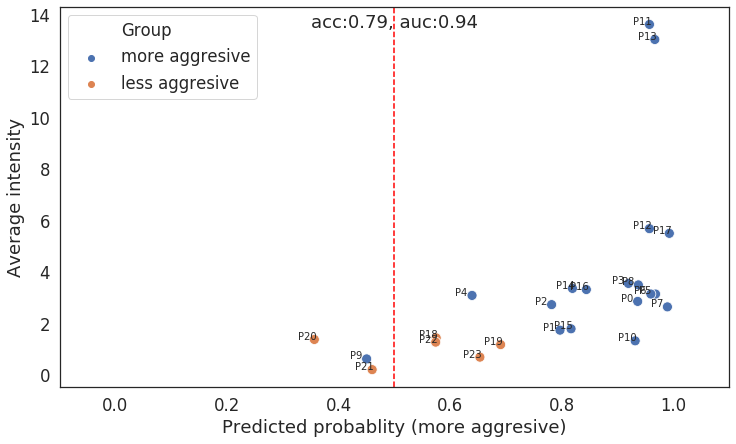

In [530]:
fig, ax = plt.subplots(figsize= (12,7))

g =sns.scatterplot(x = 'Predicted probablity', y = 'Average intensity', s= 100,
                   hue = 'Group', ax= ax, data=data)

ax.set_xlabel('Predicted probablity (more aggresive)')
ax.set_xlim(-0.1,1.1)

ax.axvline(x=0.5, ls = '--', color= 'red')

for i in range(len(data)):
    d = data.iloc[i]
    x = d['Predicted probablity']
    y1 = d['Average intensity']
    ax.text(x-0.03,y1, 'P%s' % i, fontsize=10)
 
ax.text(0.35,data['Average intensity'].max() - 0.12, 'acc:%.2f, auc:%.2f' % (acc,roc))

In [531]:
data.to_excel('./导出logistics回归-2mer.xlsx')

# 3-mer的结果

In [532]:
y = df['Group']

Y = y.map({'more aggresive':1, 'less aggresive':0})
X = df[set3]
X = sm.add_constant(X)

clf1 = sm.Logit(Y, X)
model = clf1.fit(maxiter = 2)
model.summary2()

         Current function value: 0.353086
         Iterations: 2


/home/shenwanxiang/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/shenwanxiang/anaconda3/envs/tf2/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit             Pseudo R-squared:  0.372   
Dependent Variable:  Group             AIC:               28.9482 
Date:                2020-12-28 21:08  BIC:               36.0165 
No. Observations:    24                Log-Likelihood:    -8.4741 
Df Model:            5                 LL-Null:           -13.496 
Df Residuals:        18                LLR p-value:       0.074000
Converged:           0.0000            Scale:             1.0000  
No. Iterations:      2.0000                                       
------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
------------------------------------------------------------------
const               -0.7324   0.8840 -0.8285 0.4074 -2.4650 1.0002
Her2-GRB2-SHC        0.1221   0.2615  0.4668 0.6406 -0.3904 0.6345
ER-GATA3-FOXA1       0.8099   0.5345  1.5151 0.1297 -0.2378 1.8575
PR-TIF2-SRC-1       -0.0354   0.0902 -0.3923 0.6948 -0.2122 0.1414
SCRIB-VANGL1-NOS1AP -0.0191   0.1446 -0.1319 0.8951 -0.3024 0.2643
WASF3-CYFIP1-NCKAP1  0.0574   0.0793  0.7238 0.4692 -0.0980 0.2127
==================================================================

"""

In [533]:
data = pd.DataFrame(model.predict(X), columns = ['Predicted probablity'], index = df.index)
data['Average intensity'] = X.mean(axis = 1)
data['Group'] = y

acc = accuracy_score(Y, data['Predicted probablity'].round())
acc

0.7916666666666666

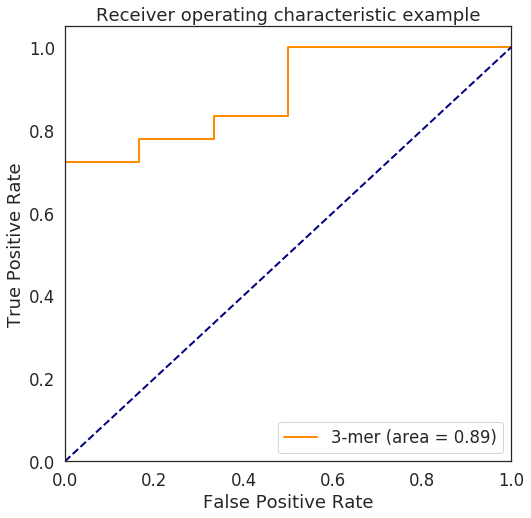

In [534]:
roc = roc_auc_score(Y, data['Predicted probablity'])
fpr, tpr, _ = roc_curve(Y, data['Predicted probablity'])

plt.figure(figsize= (8,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='3-mer (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.35, 36.623000000000005, 'acc:0.79, auc:0.89')

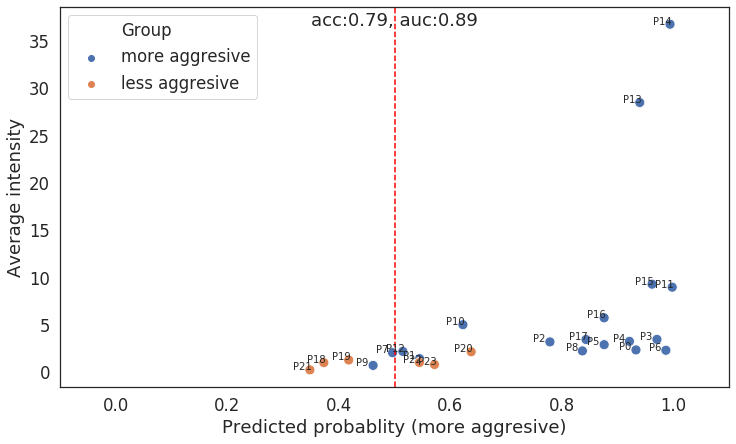

In [535]:
fig, ax = plt.subplots(figsize= (12,7))

g =sns.scatterplot(x = 'Predicted probablity', y = 'Average intensity', s= 100,
                   hue = 'Group', ax= ax, data=data)

ax.set_xlabel('Predicted probablity (more aggresive)')
ax.set_xlim(-0.1,1.1)

ax.axvline(x=0.5, ls = '--', color= 'red')

for i in range(len(data)):
    d = data.iloc[i]
    x = d['Predicted probablity']
    y1 = d['Average intensity']
    ax.text(x-0.03,y1, 'P%s' % i, fontsize=10)
 
ax.text(0.35,data['Average intensity'].max() - 0.12, 'acc:%.2f, auc:%.2f' % (acc,roc))

In [536]:
data.to_excel('./导出logistics回归-3mer.xlsx')